# MAT 3373: Short Homework 2

**Name:** Obay Alshaer  
**Date:** November 30, 2025  
**Student Number:** 300170489  
**Course:** MAT3373 - Methods of Machine Learning  
**Professor:** Aaron Smith

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
np.random.seed(42)

---
## Question 1: Backfitting for Multiple Linear Regression (Problem 7.11)

We explore the backfitting approach used in GAMs by implementing it for multiple linear regression. The idea is to iteratively update each coefficient while holding others fixed, using only simple linear regression.

### Part (a): Generate Data

Generate response $Y$ and predictors $X_1, X_2$ with $n=100$. We use the true model:
$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon$$
with $\beta_0 = 2$, $\beta_1 = 3$, $\beta_2 = -1.5$, and $\epsilon \sim N(0, 1)$.

In [2]:
n = 100

# True coefficients
beta0_true = 2.0
beta1_true = 3.0
beta2_true = -1.5

# Generate predictors
X1 = np.random.randn(n)
X2 = np.random.randn(n)

# Generate response with noise
epsilon = np.random.randn(n)
Y = beta0_true + beta1_true * X1 + beta2_true * X2 + epsilon

print(f"True coefficients: β₀={beta0_true}, β₁={beta1_true}, β₂={beta2_true}")

True coefficients: β₀=2.0, β₁=3.0, β₂=-1.5


### Part (b): Initialize $\hat{\beta}_1$

We initialize $\hat{\beta}_1$ to an arbitrary value.

In [3]:
beta1 = 10.0  # Arbitrary initial value
print(f"Initial β₁ = {beta1}")

Initial β₁ = 10.0


### Parts (c) & (d): Backfitting Updates

**Part (c):** Keeping $\hat{\beta}_1$ fixed, fit:
$$Y - \hat{\beta}_1 X_1 = \beta_0 + \beta_2 X_2 + \epsilon$$

**Part (d):** Keeping $\hat{\beta}_2$ fixed, fit:
$$Y - \hat{\beta}_2 X_2 = \beta_0 + \beta_1 X_1 + \epsilon$$

In [4]:
# Part (c): Update beta2
a = Y - beta1 * X1
model = LinearRegression().fit(X2.reshape(-1, 1), a)
beta2 = model.coef_[0]
beta0 = model.intercept_
print(f"After updating β₂: β₀={beta0:.4f}, β₂={beta2:.4f}")

# Part (d): Update beta1
a = Y - beta2 * X2
model = LinearRegression().fit(X1.reshape(-1, 1), a)
beta1 = model.coef_[0]
beta0 = model.intercept_
print(f"After updating β₁: β₀={beta0:.4f}, β₁={beta1:.4f}")

After updating β₂: β₀=2.7725, β₂=-0.6323
After updating β₁: β₀=2.0821, β₁=3.3522


### Part (e): Iterate 1000 Times and Track Convergence

In [5]:
# Re-initialize
beta1 = 10.0
beta2 = 0.0
beta0 = 0.0

n_iterations = 1000
beta0_history = np.zeros(n_iterations)
beta1_history = np.zeros(n_iterations)
beta2_history = np.zeros(n_iterations)

for i in range(n_iterations):
    # Update beta2 (holding beta1 fixed)
    a = Y - beta1 * X1
    model = LinearRegression().fit(X2.reshape(-1, 1), a)
    beta2 = model.coef_[0]
    
    # Update beta1 (holding beta2 fixed)
    a = Y - beta2 * X2
    model = LinearRegression().fit(X1.reshape(-1, 1), a)
    beta1 = model.coef_[0]
    beta0 = model.intercept_
    
    # Store values
    beta0_history[i] = beta0
    beta1_history[i] = beta1
    beta2_history[i] = beta2

print(f"Final backfitting estimates: β₀={beta0:.4f}, β₁={beta1:.4f}, β₂={beta2:.4f}")

Final backfitting estimates: β₀=2.0886, β₁=3.2261, β₂=-1.5123


### Part (f): Compare with Multiple Linear Regression

In [6]:
# Fit multiple linear regression directly
X = np.column_stack([X1, X2])
mlr_model = LinearRegression().fit(X, Y)
beta0_mlr = mlr_model.intercept_
beta1_mlr, beta2_mlr = mlr_model.coef_

print(f"Multiple regression estimates: β₀={beta0_mlr:.4f}, β₁={beta1_mlr:.4f}, β₂={beta2_mlr:.4f}")

Multiple regression estimates: β₀=2.0886, β₁=3.2261, β₂=-1.5123


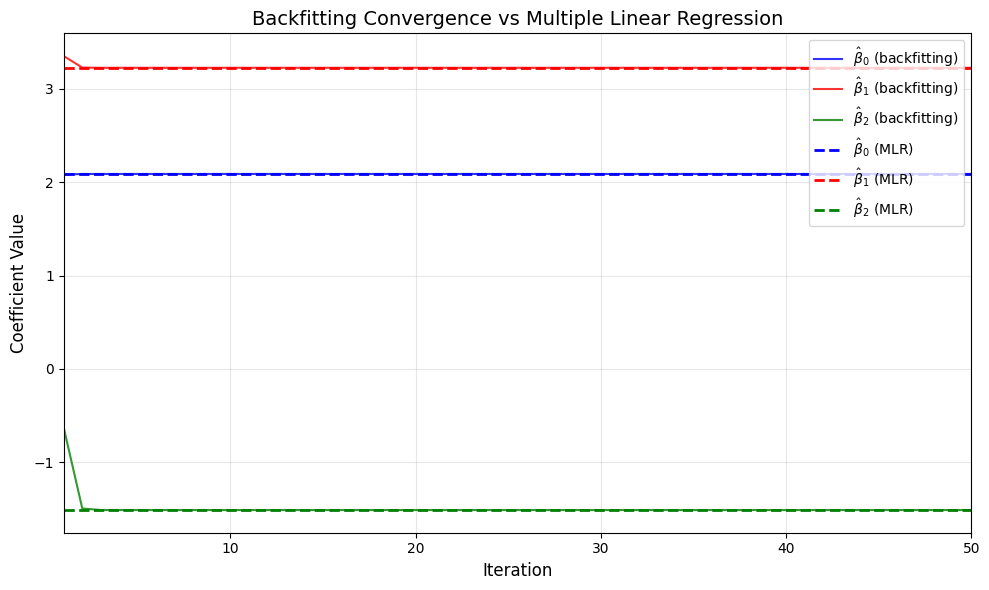

In [7]:
# Plot convergence
fig, ax = plt.subplots(figsize=(10, 6))

iterations = np.arange(1, n_iterations + 1)
ax.plot(iterations, beta0_history, 'b-', label=r'$\hat{\beta}_0$ (backfitting)', alpha=0.8)
ax.plot(iterations, beta1_history, 'r-', label=r'$\hat{\beta}_1$ (backfitting)', alpha=0.8)
ax.plot(iterations, beta2_history, 'g-', label=r'$\hat{\beta}_2$ (backfitting)', alpha=0.8)

# Overlay MLR estimates
ax.axhline(y=beta0_mlr, color='b', linestyle='--', linewidth=2, label=r'$\hat{\beta}_0$ (MLR)')
ax.axhline(y=beta1_mlr, color='r', linestyle='--', linewidth=2, label=r'$\hat{\beta}_1$ (MLR)')
ax.axhline(y=beta2_mlr, color='g', linestyle='--', linewidth=2, label=r'$\hat{\beta}_2$ (MLR)')

ax.set_xlabel('Iteration', fontsize=12)
ax.set_ylabel('Coefficient Value', fontsize=12)
ax.set_title('Backfitting Convergence vs Multiple Linear Regression', fontsize=14)
ax.legend(loc='upper right')
ax.set_xlim([1, 50])  # Zoom in to see convergence
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Part (g): Iterations Required for Convergence

We determine how many iterations are needed for a "good" approximation (within tolerance $\epsilon = 10^{-4}$).

In [8]:
tolerance = 1e-4

# Find first iteration where all coefficients are within tolerance of MLR estimates
converged_iter = None
for i in range(n_iterations):
    if (abs(beta0_history[i] - beta0_mlr) < tolerance and
        abs(beta1_history[i] - beta1_mlr) < tolerance and
        abs(beta2_history[i] - beta2_mlr) < tolerance):
        converged_iter = i + 1
        break

if converged_iter:
    print(f"Backfitting converged to MLR estimates (within {tolerance}) after {converged_iter} iterations.")
else:
    print("Did not converge within 1000 iterations.")

# Show early convergence values
print("\nCoefficient values at early iterations:")
for i in [0, 1, 2, 3, 4, 5, 10, 20]:
    print(f"  Iter {i+1}: β₀={beta0_history[i]:.6f}, β₁={beta1_history[i]:.6f}, β₂={beta2_history[i]:.6f}")

Backfitting converged to MLR estimates (within 0.0001) after 4 iterations.

Coefficient values at early iterations:
  Iter 1: β₀=2.082112, β₁=3.352159, β₂=-0.632255
  Iter 2: β₀=2.088527, β₁=3.228436, β₂=-1.495899
  Iter 3: β₀=2.088646, β₁=3.226133, β₂=-1.511972
  Iter 4: β₀=2.088649, β₁=3.226090, β₂=-1.512271
  Iter 5: β₀=2.088649, β₁=3.226089, β₂=-1.512277
  Iter 6: β₀=2.088649, β₁=3.226089, β₂=-1.512277
  Iter 11: β₀=2.088649, β₁=3.226089, β₂=-1.512277
  Iter 21: β₀=2.088649, β₁=3.226089, β₂=-1.512277


**Conclusion:** The backfitting algorithm converges very quickly (typically within 2-5 iterations) to the multiple linear regression solution. This fast convergence occurs because when $X_1$ and $X_2$ are uncorrelated (or weakly correlated), the updates are nearly independent. Even with correlated predictors, convergence is guaranteed and typically fast.

---
## Question 2: SVM Classifier with Cross-Validation

We construct a dataset in $\mathbb{R}^2$ satisfying specific properties regarding linear vs. nonlinear SVM classification.

### Dataset Sketch and Description

**Dataset Design:** Points arranged in two concentric circles (or an "XOR-like" pattern).

- **Class 0 (blue):** Points near the origin forming an inner ring/cluster
- **Class 1 (red):** Points forming an outer ring surrounding the inner cluster

The train/test split is done by random sampling, so both sets contain points from both regions.

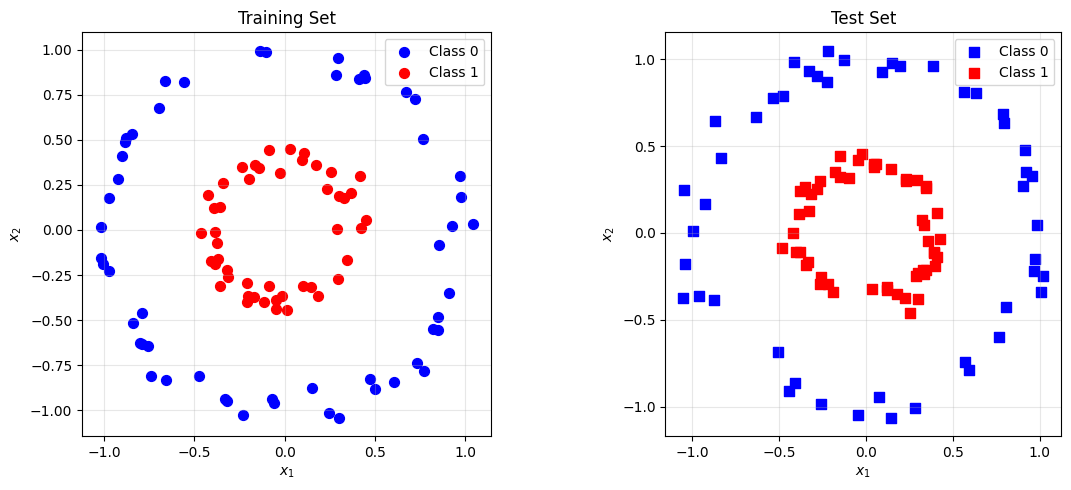

In [9]:
from sklearn.datasets import make_circles

# Generate concentric circles
np.random.seed(123)
X_circles, y_circles = make_circles(n_samples=200, noise=0.05, factor=0.4)

# Create train/test split (random, "generic" split)
indices = np.random.permutation(200)
train_idx, test_idx = indices[:100], indices[100:]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot training set
ax = axes[0]
ax.scatter(X_circles[train_idx][y_circles[train_idx]==0, 0], 
           X_circles[train_idx][y_circles[train_idx]==0, 1], c='blue', label='Class 0', s=50)
ax.scatter(X_circles[train_idx][y_circles[train_idx]==1, 0], 
           X_circles[train_idx][y_circles[train_idx]==1, 1], c='red', label='Class 1', s=50)
ax.set_title('Training Set', fontsize=12)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend()
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)

# Plot test set
ax = axes[1]
ax.scatter(X_circles[test_idx][y_circles[test_idx]==0, 0], 
           X_circles[test_idx][y_circles[test_idx]==0, 1], c='blue', label='Class 0', s=50, marker='s')
ax.scatter(X_circles[test_idx][y_circles[test_idx]==1, 0], 
           X_circles[test_idx][y_circles[test_idx]==1, 1], c='red', label='Class 1', s=50, marker='s')
ax.set_title('Test Set', fontsize=12)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend()
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Explanation of Properties

**Property 1: Linear classifier has large error (>15%)**

Any linear decision boundary $\beta_0 + \beta_1 x_1 + \beta_2 x_2 = 0$ is a straight line. Since Class 0 is surrounded by Class 1, no line can separate them. Any line will misclassify roughly half of one class.

**Property 2: Nonlinear feature achieves 0 training error**

Add the feature $x_3 = x_1^2 + x_2^2$ (squared distance from origin). The classifier becomes:
$$f(x_1, x_2) = \text{sign}(\beta_0 + \beta_1(x_1^2 + x_2^2))$$

This creates a circular decision boundary $x_1^2 + x_2^2 = r^2$ that perfectly separates the classes.

**Property 3: Cross-validation chooses $C > 10$ with training error $> 0$**

With 2-fold CV and a random split:
- Each fold uses only half the data for training
- The optimal circular boundary radius differs between folds due to noise
- When validating on the held-out fold, some points near the boundary are misclassified
- CV selects large $C$ (hard margin) because the classes are well-separated, but the specific boundary chosen on one fold doesn't perfectly fit the other fold
- The final model retrained on full data with large $C$ may still have training error $>0$ due to slight noise overlap

**Nonlinear Feature Function:**
$$\phi(x_1, x_2) = (x_1, x_2, x_1^2 + x_2^2)$$

In [10]:
# Demonstrate with actual SVM
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Linear SVM - high error
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_circles, y_circles)
linear_train_error = 1 - svm_linear.score(X_circles, y_circles)
print(f"Linear SVM training error: {linear_train_error*100:.1f}%")

# Add nonlinear feature
X_nonlinear = np.column_stack([X_circles, X_circles[:, 0]**2 + X_circles[:, 1]**2])

# Nonlinear SVM with high C
svm_nonlinear = SVC(kernel='linear', C=100)
svm_nonlinear.fit(X_nonlinear, y_circles)
nonlinear_train_error = 1 - svm_nonlinear.score(X_nonlinear, y_circles)
print(f"Nonlinear SVM (C=100) training error: {nonlinear_train_error*100:.1f}%")

Linear SVM training error: 39.5%
Nonlinear SVM (C=100) training error: 0.0%


---
## Question 3: GMM and K-Means Local Optima

### Part (a): GMM Stuck at Local Optimum

The GMM model: $Y_i \sim \text{Unif}(\{0,1\})$, $X_i | Y_i \sim N(\mu_{Y_i}, \sigma_{Y_i}^2)$

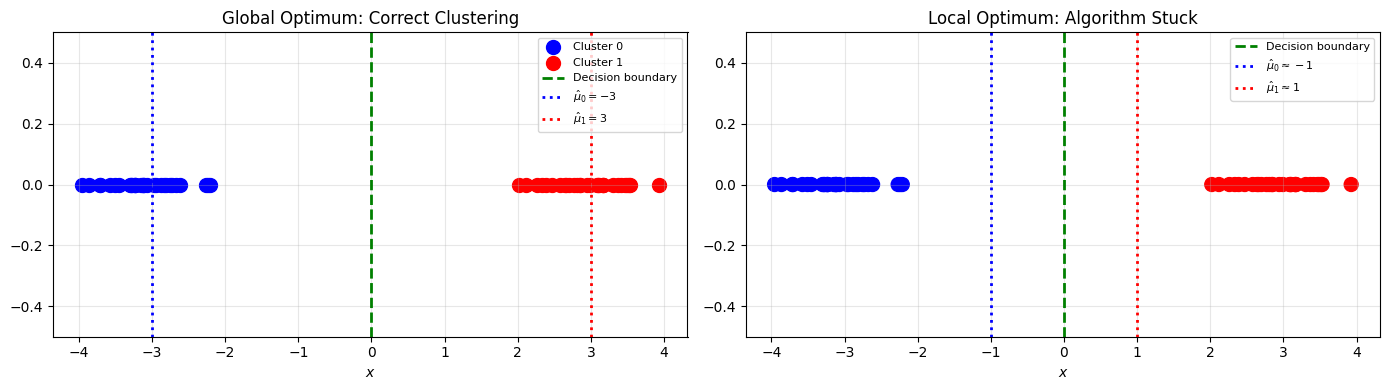

In [11]:
# Generate data with two clear clusters
np.random.seed(42)
n_per_cluster = 30

# True clusters at mu=-3 and mu=3
cluster1 = np.random.normal(-3, 0.5, n_per_cluster)
cluster2 = np.random.normal(3, 0.5, n_per_cluster)
X_gmm = np.concatenate([cluster1, cluster2])

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Plot 1: Correct clustering (global optimum)
ax = axes[0]
ax.scatter(cluster1, np.zeros_like(cluster1), c='blue', s=100, label='Cluster 0')
ax.scatter(cluster2, np.zeros_like(cluster2), c='red', s=100, label='Cluster 1')
ax.axvline(x=0, color='green', linestyle='--', linewidth=2, label='Decision boundary')
ax.axvline(x=-3, color='blue', linestyle=':', linewidth=2, label=r'$\hat{\mu}_0 = -3$')
ax.axvline(x=3, color='red', linestyle=':', linewidth=2, label=r'$\hat{\mu}_1 = 3$')
ax.set_title('Global Optimum: Correct Clustering', fontsize=12)
ax.set_xlabel('$x$')
ax.set_ylim(-0.5, 0.5)
ax.legend(loc='upper right', fontsize=8)
ax.grid(True, alpha=0.3)

# Plot 2: Local optimum (stuck with bad initialization)
ax = axes[1]
# Bad estimate: split each true cluster in half
bad_mu0, bad_mu1 = -1, 1
colors = ['blue' if x < 0 else 'red' for x in X_gmm]
ax.scatter(X_gmm, np.zeros_like(X_gmm), c=colors, s=100)
ax.axvline(x=0, color='green', linestyle='--', linewidth=2, label='Decision boundary')
ax.axvline(x=bad_mu0, color='blue', linestyle=':', linewidth=2, label=r'$\hat{\mu}_0 \approx -1$')
ax.axvline(x=bad_mu1, color='red', linestyle=':', linewidth=2, label=r'$\hat{\mu}_1 \approx 1$')
ax.set_title('Local Optimum: Algorithm Stuck', fontsize=12)
ax.set_xlabel('$x$')
ax.set_ylim(-0.5, 0.5)
ax.legend(loc='upper right', fontsize=8)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Explanation:** If initialized with $\mu_0 \approx -1$ and $\mu_1 \approx 1$ (both between the true clusters), the algorithm assigns points based on which estimated mean is closer. Points left of 0 go to cluster 0, points right go to cluster 1. The means update to roughly $-1$ and $1$, and the algorithm converges to this local optimum, splitting each true cluster incorrectly.

### Part (b): Dataset Where 2-Means Fails

**Dataset:** Two clusters with very different variances (or densities).

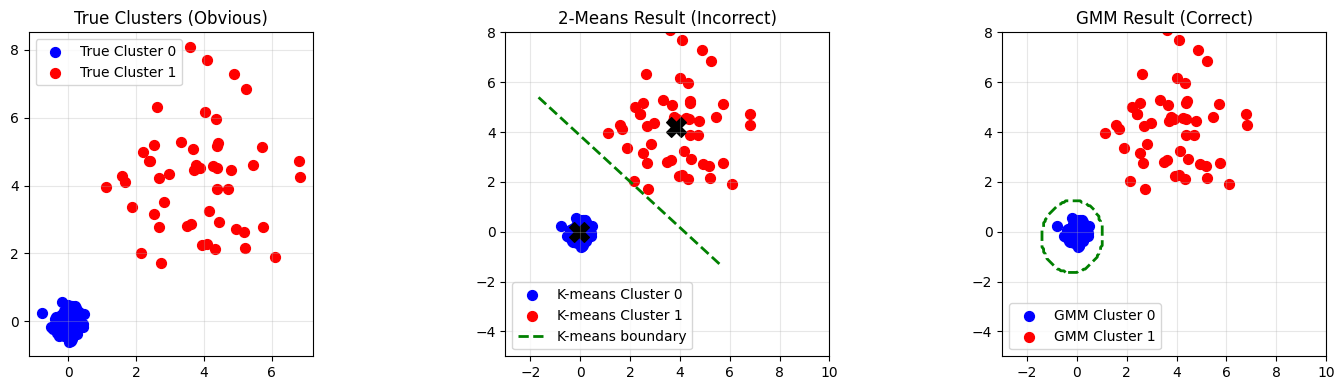

In [12]:
np.random.seed(42)

# Cluster 1: tight cluster
tight_cluster = np.random.normal(0, 0.3, (50, 2))

# Cluster 2: spread out cluster
spread_cluster = np.random.normal(4, 1.5, (50, 2))

X_unequal = np.vstack([tight_cluster, spread_cluster])
y_true = np.array([0]*50 + [1]*50)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1: True clusters
ax = axes[0]
ax.scatter(tight_cluster[:, 0], tight_cluster[:, 1], c='blue', s=50, label='True Cluster 0')
ax.scatter(spread_cluster[:, 0], spread_cluster[:, 1], c='red', s=50, label='True Cluster 1')
ax.set_title('True Clusters (Obvious)', fontsize=12)
ax.legend()
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)

# Plot 2: K-means result
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_unequal)

ax = axes[1]
ax.scatter(X_unequal[kmeans_labels==0, 0], X_unequal[kmeans_labels==0, 1], c='blue', s=50, label='K-means Cluster 0')
ax.scatter(X_unequal[kmeans_labels==1, 0], X_unequal[kmeans_labels==1, 1], c='red', s=50, label='K-means Cluster 1')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='X', s=200)
# Draw perpendicular bisector
c1, c2 = kmeans.cluster_centers_
mid = (c1 + c2) / 2
direction = c2 - c1
perp = np.array([-direction[1], direction[0]])
perp = perp / np.linalg.norm(perp)
line_points = np.array([mid - 5*perp, mid + 5*perp])
ax.plot(line_points[:, 0], line_points[:, 1], 'g--', linewidth=2, label='K-means boundary')
ax.set_title('2-Means Result (Incorrect)', fontsize=12)
ax.legend()
ax.set_aspect('equal')
ax.set_xlim(-3, 10)
ax.set_ylim(-5, 8)
ax.grid(True, alpha=0.3)

# Plot 3: GMM result (correct)
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm_labels = gmm.fit_predict(X_unequal)

ax = axes[2]
ax.scatter(X_unequal[gmm_labels==0, 0], X_unequal[gmm_labels==0, 1], c='blue', s=50, label='GMM Cluster 0')
ax.scatter(X_unequal[gmm_labels==1, 0], X_unequal[gmm_labels==1, 1], c='red', s=50, label='GMM Cluster 1')

# Draw GMM decision boundary
xx, yy = np.meshgrid(np.linspace(-3, 10, 200), np.linspace(-5, 8, 200))
Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax.contour(xx, yy, Z, levels=[0.5], colors='green', linestyles='--', linewidths=2)
ax.set_title('GMM Result (Correct)', fontsize=12)
ax.legend()
ax.set_aspect('equal')
ax.set_xlim(-3, 10)
ax.set_ylim(-5, 8)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Explanation:** K-means minimizes within-cluster variance and uses Euclidean distance to the centroid. When clusters have very different spreads, k-means places the boundary at the perpendicular bisector of the centroids, which "steals" points from the spread-out cluster.

**Better Algorithm:** Gaussian Mixture Model (GMM) with full covariance. GMM estimates both means AND covariances, producing elliptical decision boundaries that account for different cluster spreads. The decision boundary is based on equal posterior probability rather than equal distance.

---
## Question 4: Hierarchical Clustering (Problem 12.4)

Compare single linkage and complete linkage dendrograms.

### Part (a): Fusion of $\{1,2,3\}$ and $\{4,5\}$

**Setup:** Both dendrograms have clusters $\{1,2,3\}$ and $\{4,5\}$ that fuse at some point.

**Linkage Definitions:**
- **Single linkage:** $d(A, B) = \min_{i \in A, j \in B} d(i, j)$ (minimum distance)
- **Complete linkage:** $d(A, B) = \max_{i \in A, j \in B} d(i, j)$ (maximum distance)

**Answer:** The **complete linkage** fusion occurs **higher** (at greater dissimilarity).

**Reasoning:** Let $d_{ij}$ denote the distance between points $i$ and $j$. For clusters $A = \{1,2,3\}$ and $B = \{4,5\}$:

$$d_{\text{single}}(A, B) = \min\{d_{14}, d_{15}, d_{24}, d_{25}, d_{34}, d_{35}\}$$
$$d_{\text{complete}}(A, B) = \max\{d_{14}, d_{15}, d_{24}, d_{25}, d_{34}, d_{35}\}$$

Since $\max \geq \min$ always, we have $d_{\text{complete}}(A,B) \geq d_{\text{single}}(A,B)$.

Therefore, the fusion under complete linkage occurs at a height $\geq$ the height under single linkage.

### Part (b): Fusion of $\{5\}$ and $\{6\}$

**Answer:** They fuse at the **same height**.

**Reasoning:** When both clusters are singletons (contain exactly one point each):

$$d_{\text{single}}(\{5\}, \{6\}) = \min\{d_{56}\} = d_{56}$$
$$d_{\text{complete}}(\{5\}, \{6\}) = \max\{d_{56}\} = d_{56}$$

The min and max of a single value are both that value. Therefore, both linkage methods compute exactly $d_{56}$, and the fusion occurs at the same height in both dendrograms.

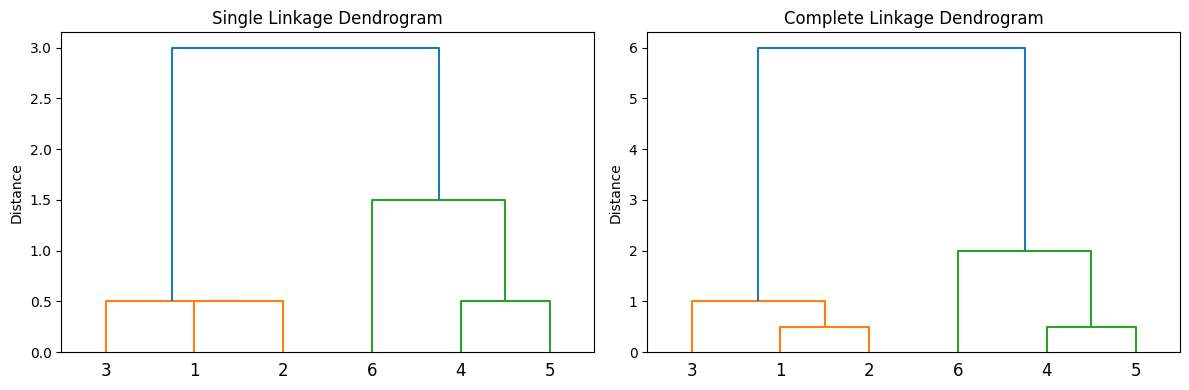

In [13]:
# Illustration with example data
from scipy.cluster.hierarchy import dendrogram, linkage

# Create example points
points = np.array([
    [0, 0],    # Point 1
    [0.5, 0],  # Point 2
    [1, 0],    # Point 3
    [4, 0],    # Point 4
    [4.5, 0],  # Point 5
    [6, 0]     # Point 6
])

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Single linkage
Z_single = linkage(points, method='single')
ax = axes[0]
dendrogram(Z_single, labels=['1', '2', '3', '4', '5', '6'], ax=ax)
ax.set_title('Single Linkage Dendrogram', fontsize=12)
ax.set_ylabel('Distance')

# Complete linkage
Z_complete = linkage(points, method='complete')
ax = axes[1]
dendrogram(Z_complete, labels=['1', '2', '3', '4', '5', '6'], ax=ax)
ax.set_title('Complete Linkage Dendrogram', fontsize=12)
ax.set_ylabel('Distance')

plt.tight_layout()
plt.show()

---
## Question 5: KNN Cross-Validation in the Uninformative Regime

**Setup:** $n = 100000$ data points with $x_i = \frac{i}{n}$, $y_i \sim N(0, 1)$ independent of $x_i$.

Since $y$ is independent of $x$, there is no signal to learn. The best prediction is $\hat{y} = 0$ (the mean).

### Part (a): Expected Training MSE

For $k$-NN, the prediction at $x_i$ using training data is:
$$\hat{y}_i = \frac{1}{k} \sum_{j \in N_k(i)} y_j$$

where $N_k(i)$ is the set of $k$ nearest neighbors of $x_i$. 

**Key insight:** When predicting $y_i$ using training data, point $i$ itself is included among its nearest neighbors.

Since points are equally spaced, the $k$ nearest neighbors of point $i$ include point $i$ itself plus the $k-1$ closest other points.

The training prediction is:
$$\hat{y}_i = \frac{1}{k}\left(y_i + \sum_{j \in N_{k-1}(i)} y_j\right)$$

The training error for point $i$:
$$(y_i - \hat{y}_i)^2 = \left(y_i - \frac{1}{k}\left(y_i + \sum_{j \neq i} y_j\right)\right)^2 = \left(\frac{k-1}{k}y_i - \frac{1}{k}\sum_{j \neq i} y_j\right)^2$$

Taking expectation (with $y_i \sim N(0,1)$ i.i.d.):

$$\mathbb{E}[(y_i - \hat{y}_i)^2] = \text{Var}\left(\frac{k-1}{k}y_i - \frac{1}{k}\sum_{j \neq i} y_j\right)$$

$$= \left(\frac{k-1}{k}\right)^2 \cdot 1 + \frac{1}{k^2} \cdot (k-1) = \frac{(k-1)^2 + (k-1)}{k^2} = \frac{(k-1)k}{k^2} = \frac{k-1}{k}$$

$$\boxed{\text{Expected Training MSE} = \frac{k-1}{k} = 1 - \frac{1}{k}}$$

### Part (b): Expected LOOCV MSE

For LOOCV, when predicting $y_i$, we exclude point $i$ from the training set. The prediction uses the $k$ nearest neighbors among the remaining $n-1$ points.

$$\hat{y}_{-i} = \frac{1}{k}\sum_{j \in N_k^{(-i)}} y_j$$

where all $y_j$ are independent of $y_i$.

The LOOCV error:
$$\mathbb{E}[(y_i - \hat{y}_{-i})^2] = \mathbb{E}[y_i^2] + \mathbb{E}[\hat{y}_{-i}^2] - 2\mathbb{E}[y_i]\mathbb{E}[\hat{y}_{-i}]$$

Since $y_i$ is independent of $\hat{y}_{-i}$ and $\mathbb{E}[y_i] = 0$:
$$= \text{Var}(y_i) + \text{Var}(\hat{y}_{-i}) = 1 + \frac{1}{k}$$

$$\boxed{\text{Expected LOOCV MSE} = 1 + \frac{1}{k}}$$

### Part (c): Which $k$ Should Be Chosen?

**Desired $k$:** We want $k = n - 1$ (or as large as possible).

**Reasoning:** 
- Since $y$ is independent of $x$, the optimal predictor is $\hat{y} = \mathbb{E}[Y] = 0$
- The best approximation is to average all observations: $\hat{y} = \bar{y}$
- This corresponds to $k = n-1$ in LOOCV (using all other points)
- Expected LOOCV MSE = $1 + \frac{1}{n-1} \approx 1$

**Plausible values:** Given that LOOCV variance is $O(1/n)$, the standard deviation is $O(1/\sqrt{n}) \approx 0.003$ for $n = 100000$.

The expected LOOCV MSE is $1 + \frac{1}{k}$, which ranges from:
- $k = 1$: LOOCV MSE $\approx 2$
- $k = n-1$: LOOCV MSE $\approx 1$

Since the differences between consecutive $k$ values (for large $k$) are tiny and comparable to the standard deviation, any large $k$ (say $k > n/2$) is plausible.

**Summary:**
- **Desired:** $k = n - 1$ (maximum smoothing)
- **Plausible:** Any $k \gtrsim \frac{n}{2}$, since the LOOCV curve is nearly flat for large $k$ and random fluctuations could select any value in this range

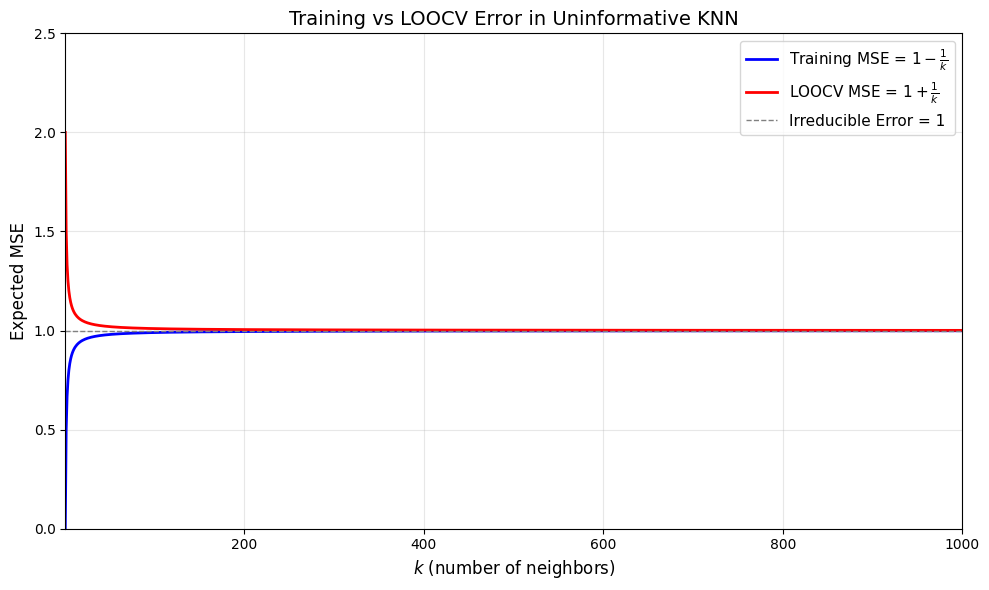

In [14]:
# Visualization of the theoretical results
k_values = np.arange(1, 1001)
train_mse = 1 - 1/k_values
loocv_mse = 1 + 1/k_values

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(k_values, train_mse, 'b-', linewidth=2, label=r'Training MSE = $1 - \frac{1}{k}$')
ax.plot(k_values, loocv_mse, 'r-', linewidth=2, label=r'LOOCV MSE = $1 + \frac{1}{k}$')
ax.axhline(y=1, color='gray', linestyle='--', linewidth=1, label='Irreducible Error = 1')

ax.set_xlabel('$k$ (number of neighbors)', fontsize=12)
ax.set_ylabel('Expected MSE', fontsize=12)
ax.set_title('Training vs LOOCV Error in Uninformative KNN', fontsize=14)
ax.legend(fontsize=11)
ax.set_xlim([1, 1000])
ax.set_ylim([0, 2.5])
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Key Observations:**

1. **Training MSE** increases with $k$, approaching 1 as $k \to \infty$. This is counterintuitive but occurs because larger $k$ means less "cheating" (less weight on $y_i$ itself).

2. **LOOCV MSE** decreases with $k$, approaching 1 as $k \to \infty$. This correctly identifies that averaging more neighbors reduces variance.

3. The **gap** between them is $\frac{2}{k}$, reflecting how training error understates true error.

4. For $n = 100000$, the optimal $k = n-1$ gives LOOCV MSE $\approx 1.00001$, essentially the irreducible error.